INTRODUCTION:--

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level(Hemoglobin A1c), and blood glucose leve

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv(r"C:\Users\hb292\Downloads\glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


I compared Na (Sodium Oxide content) and RI (Refractive Index) because:


1. Both are important physical and chemical properties of glass

Na affects the chemical composition and structure of the glass.

RI shows how the glass bends light.

Together, they describe both chemical and optical behavior of the glass.

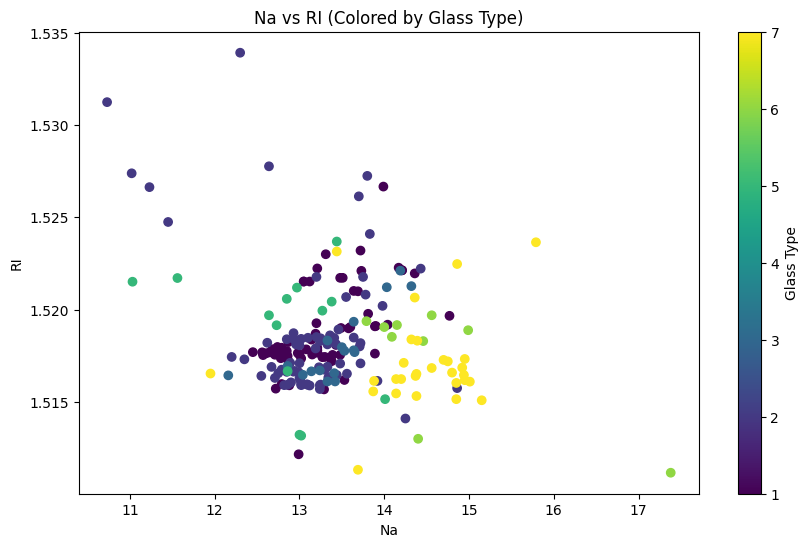

In [107]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(df["Na"], df["RI"], c=df["Type"], cmap="viridis")

plt.xlabel("Na")
plt.ylabel("RI")
plt.title("Na vs RI (Colored by Glass Type)")

# Add this line for color mapping legend
plt.colorbar(scatter, label="Glass Type")

plt.show()


In [108]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [109]:
X = df[['RI', 'Na', 'Mg', 'Al']]
Y = df['Type']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [111]:
#making dictionary because: Clean code — Easy looping — Model names mil jaate — Easily extendable — No repetition
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB()
}

In [112]:
for name, model in models.items():
    print("\n==============================")
    print(name)
    print("==============================")

    model.fit(X_train, y_train)
    pred = model.predict(X_test)

 # Accuracy Score
    score = accuracy_score(y_test, pred)
    print(f"Accuracy Score: {score:.3f}")
 
 # Confusion Matrix
    cm = confusion_matrix(y_test, pred)
    print("Confusion Matrix:")
    print(cm)



KNN
Accuracy Score: 0.651
Confusion Matrix:
[[9 2 0 0 0 0]
 [6 7 0 0 0 1]
 [2 1 0 0 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 1 2]
 [0 1 0 0 0 7]]

Logistic Regression
Accuracy Score: 0.698
Confusion Matrix:
[[ 9  2  0  0  0  0]
 [ 2 12  0  0  0  0]
 [ 1  2  0  0  0  0]
 [ 0  2  0  1  0  1]
 [ 0  1  0  0  1  1]
 [ 0  1  0  0  0  7]]

Naive Bayes
Accuracy Score: 0.535
Confusion Matrix:
[[10  1  0  0  0  0]
 [ 9  3  0  1  0  1]
 [ 3  0  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  1  2]
 [ 0  1  0  0  0  7]]
